# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Muhammad Hafidz Rizki
- **Email:** hafidzrizki443@gmail.com
- **ID Dicoding:** hafidzrizki34

Proyek ini bertujuan untuk menganalisis data penggunaan Bike Sharing. Analisis dilakukan untuk menjawab dua pertanyaan bisnis di bawah ini.

## Menentukan Pertanyaan Bisnis

 - Bagaimana pengaruh variabel cuaca khususnya temperatur terhadap jumlah penyewaan sepeda secara harian?
- Bagaimana pola penggunaan sepeda per jam, dan kapan terjadi peak usage yang dapat dijadikan acuan untuk pengaturan armada?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [25]:
df_day = pd.read_csv('data/day.csv')
print("Dataset Harian (day.csv):")
print(df_day.head())

df_hour = pd.read_csv('data/hour.csv')
print("\nDataset Per Jam (hour.csv):")
print(df_hour.head())

Dataset Harian (day.csv):
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
- Dataset Harian (day.csv) memiliki 731 baris dengan 16 kolom. Data ini merepresentasikan agregasi penyewaan sepeda per hari.
- Dataset Per Jam (hour.csv) memiliki 17.379 baris dengan 17 kolom. Data ini merepresentasikan detail penyewaan sepeda per jam.

### Assessing Data

In [26]:
print("Info Dataset Harian:")
df_day.info()

print("\nInfo Dataset Per Jam:")
df_hour.info()

# Mengecek missing values
print("\nMissing Values - Data Harian:")
print(df_day.isnull().sum())

print("\nMissing Values - Data Per Jam:")
print(df_hour.isnull().sum())

Info Dataset Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Info Dataset Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

**Insight:**
- Kolom dteday bertipe object, perlu dikonversi ke tipe datetime untuk memudahkan analisis waktu.
- Sebagian kolom bersifat kategorik (misalnya, season, yr, mnth, weekday, workingday, weathersit) namun disimpan dalam bentuk angka (integer). Kolom-kolom ini bisa di-map ke label deskriptif jika dibutuhkan.
- Terdapat kolom instant yang tampaknya hanya berfungsi sebagai indeks unik (ID) dan tidak memiliki makna analitis langsung.
- Tidak ada data duplikat dan tidak ada data yang hilang di kedua dataset.

### Cleaning Data

In [27]:
# Konversi kolom tanggal
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Pastikan kolom jam (hr) adalah integer
df_hour['hr'] = df_hour['hr'].astype(int)

# Tambahkan kolom hari dalam seminggu (day_of_week) di dataset harian
df_day['day_of_week'] = df_day['dteday'].dt.day_name()

# Tambahkan kolom kategori waktu (pagi, siang, sore, malam) di dataset per jam
def time_of_day(hr):
    if 5 <= hr < 12:
        return 'Pagi'
    elif 12 <= hr < 17:
        return 'Siang'
    elif 17 <= hr < 21:
        return 'Sore'
    else:
        return 'Malam'
        
df_hour['time_category'] = df_hour['hr'].apply(time_of_day)

**Insight:**
- Telah dilakukan konversi kolom dteday menjadi tipe datetime di kedua dataset.
- Kolom hr di dataset per jam sudah dipastikan tipe datanya adalah integer.
- Kolom tambahan seperti day_of_week atau time_category (pagi, siang, sore, malam) untuk membantu analisis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
print("Statistik Deskriptif - Data Harian:")
display(df_day.describe())

print("\nStatistik Deskriptif - Data Per Jam:")
display(df_hour.describe())

Statistik Deskriptif - Data Harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452



Statistik Deskriptif - Data Per Jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**

Untuk data harian (day.csv):
- Rata-rata cnt (jumlah penyewaan) sekitar 4504.35 per hari.
- Nilai minimum cnt adalah 22, sedangkan maksimum cnt mencapai 8714.
- Kolom temp, atemp, hum, dan windspeed menggunakan skala normalized (0–1).

Untuk data per jam (hour.csv):
- Rata-rata cnt sekitar 189.46 per jam.
- Nilai minimum cnt adalah 1, sedangkan maksimum cnt mencapai 977.
- Jumlah baris jauh lebih banyak (17.379) karena data dicatat per jam.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

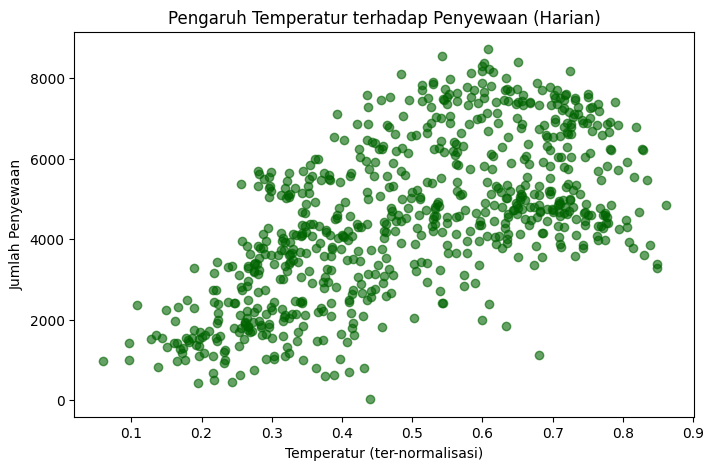

In [32]:
# Scatter plot antara temperatur dan penyewaan harian
plt.figure(figsize=(8,5))
plt.scatter(df_day['temp'], df_day['cnt'], alpha=0.6, color='darkgreen')
plt.title('Pengaruh Temperatur terhadap Penyewaan (Harian)')
plt.xlabel('Temperatur (ter-normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2:

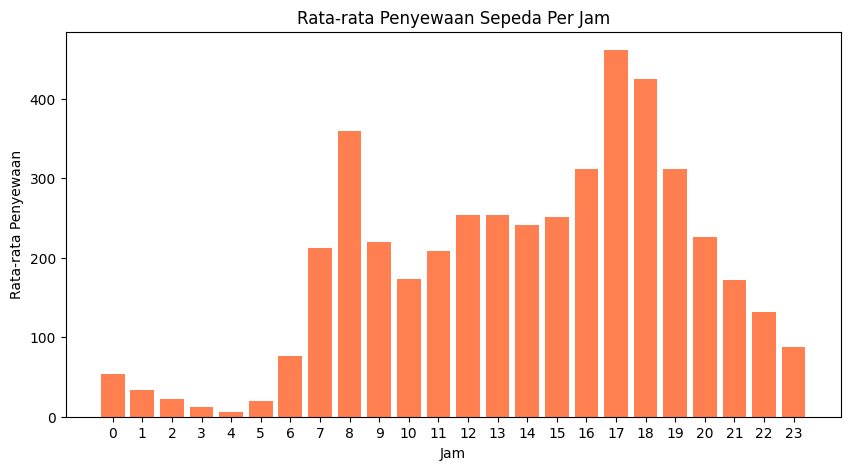

C:\Users\User\AppData\Local\Temp\ipykernel_18816\566890143.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_category', y='cnt', data=avg_time_category, palette='viridis')


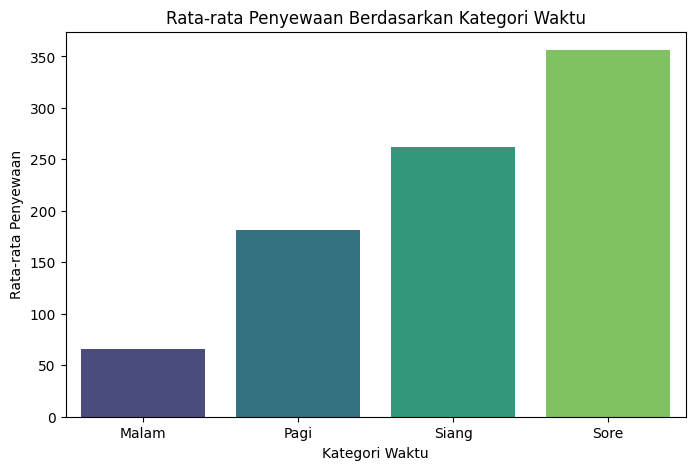

In [33]:
# Rata-rata penyewaan per jam
avg_hourly = df_hour.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.bar(avg_hourly['hr'], avg_hourly['cnt'], color='coral')
plt.title('Rata-rata Penyewaan Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0,24))
plt.show()

# Rata-rata penyewaan berdasarkan kategori waktu
avg_time_category = df_hour.groupby('time_category')['cnt'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='time_category', y='cnt', data=avg_time_category, palette='viridis')
plt.title('Rata-rata Penyewaan Berdasarkan Kategori Waktu')
plt.xlabel('Kategori Waktu')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**

Dari pertanyaan 1:
- Terdapat korelasi positif yang cukup jelas antara temp dan cnt. Hal ini menunjukkan bahwa orang cenderung lebih banyak menggunakan sepeda saat cuaca lebih hangat.

Dari pertanyaan 2:
- Peak usage terjadi pada sore hari (sekitar jam 5–6 sore), kemungkinan bertepatan dengan jam pulang kantor/aktivitas rutin.
- Terdapat lonjakan di pagi hari (sekitar jam 7–8) yang juga berkaitan dengan jam masuk kerja/sekolah.
- Penggunaan malam hari tergolong rendah, sehingga potensi penghematan biaya operasional dapat dilakukan dengan mengurangi sepeda atau jadwal pemeliharaan di malam hari.

## Analisis Lanjutan (Opsional)

  is_weekend          cnt
0    Weekday  4550.566219
1    Weekend  4389.685714


C:\Users\User\AppData\Local\Temp\ipykernel_18816\239321427.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='cnt', data=avg_usage_weekend, palette='pastel')


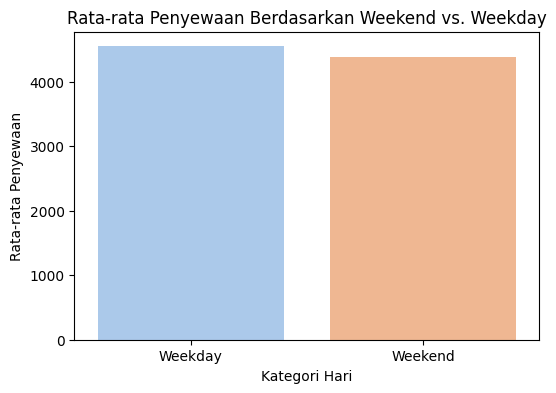

In [38]:
def weekend_or_not(weekday_value):
    # Jika weekday_value adalah 0 (Minggu) atau 6 (Sabtu), maka weekend
    if weekday_value in [0, 6]:
        return 'Weekend'
    else:
        return 'Weekday'

df_day['is_weekend'] = df_day['weekday'].apply(weekend_or_not)

# Rata-rata penyewaan berdasarkan weekend vs weekday
avg_usage_weekend = df_day.groupby('is_weekend')['cnt'].mean().reset_index()
print(avg_usage_weekend)

plt.figure(figsize=(6,4))
sns.barplot(x='is_weekend', y='cnt', data=avg_usage_weekend, palette='pastel')
plt.title('Rata-rata Penyewaan Berdasarkan Weekend vs. Weekday')
plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

  season_name          cnt
0        Fall  5644.303191
1      Spring  2604.132597
2      Summer  4992.331522
3      Winter  4728.162921


C:\Users\User\AppData\Local\Temp\ipykernel_18816\989821542.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=avg_usage_season, order=['Spring','Summer','Fall','Winter'], palette='Spectral')


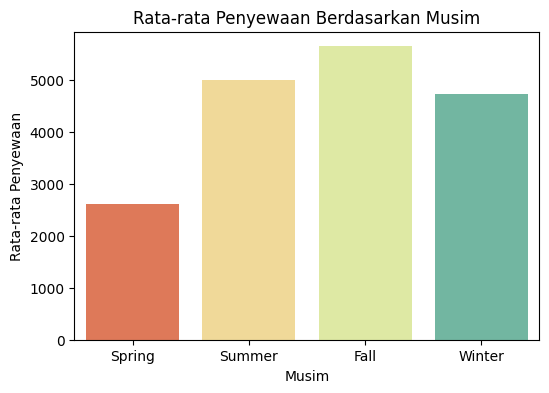

In [39]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season_name'] = df_day['season'].map(season_map)

# Rata-rata penyewaan per musim
avg_usage_season = df_day.groupby('season_name')['cnt'].mean().reset_index()
print(avg_usage_season)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(x='season_name', y='cnt', data=avg_usage_season, order=['Spring','Summer','Fall','Winter'], palette='Spectral')
plt.title('Rata-rata Penyewaan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

In [40]:
# Definisikan batas bin
bins = [0, 3000, 6000, 10000]  
labels = ['Low', 'Medium', 'High']

df_day['usage_category'] = pd.cut(df_day['cnt'], bins=bins, labels=labels)

# Banyak hari di tiap kategori
print(df_day['usage_category'].value_counts())

usage_category
Medium    379
High      180
Low       172
Name: count, dtype: int64


**Insight:**

- Rata-rata penyewaan lebih tinggi di Weekday, yang menunjukkan bisa jadi sepeda digunakan sebagai moda transportasi harian untuk pergi bekerja atau kuliah.
- Musim dengan rata-rata penyewaan tertinggi adalah saat fall yang menunjukkan bahwa pengguna lebih sering bersepeda di musim fall.
- Mayoritas hari masuk kategori Medium, artinya demand rata-rata sudah stabil di level menengah.

## Conclusion

- Conclution pertanyaan 1: 
Cuaca khususnya temperatur memiliki korelasi positif dengan jumlah penyewaan sepeda. Semakin hangat suhu, semakin banyak pengguna yang tertarik untuk bersepeda. Hal ini menunjukkan pentingnya memperhatikan faktor cuaca untuk memprediksi permintaan.
- Conclution pertanyaan 2: 
Pola penggunaan sepeda menonjol pada jam sibuk (pagi sekitar jam 7–8 dan sore sekitar jam 17–18). Waktu sore tercatat sebagai puncak tertinggi. Dengan demikian, penambahan sepeda di jam-jam tersebut dapat meningkatkan pelayanan, sementara pengurangan sepeda di malam hari dapat menghemat biaya.